# Отчет


## Введение

Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Ограничения.
Для воспроизводимости результатов исслеования в задаче присутствуют некоторые ограничения:
- random_state = 250722
- метрика качества: AUC-ROC


## Данные

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<br><br>
Первое что я посчитал необходимым сделать - это объединение талиц. В каждой таблице присутсвует поле с ID абонента по которому и провел объединение таблиц в одну. Всего записей получилось 7043. Колонок суммарно получилось - 20. Появились пропуски из-за отсутсвия информации по некоторым абоннтам в таблицах. 
<br><br>
Данные охватывают времменной период с 2014 по 2020 годы.
Данных можно сказать совсем не много, но достаточно чтобы изучить взаимосвязи.


## Признаки и предварительная обработка

customerID в принципе информации в себе не несут - удалил из датасета за ненадобностью.
<br><br>
Для дальнейшего исследования потребовалось создать дополнительные признаки с помощью столбцов с датой подключения и датой расторжения контракта.
- duration срок жизни абонента(количество дней),
- abonent Текущий абонент(да\нет).
Признак abonent  является целевым, поэтому дальнейшие исследования будут искать влияние осталных признаков на него.
<br><br>
С помощью визуализациии распределения во времени количества подключаемых абонентов видим что в январе 2014 было начало подключений, затем количество пдключений в меяц постепенно сокращалось до декабра 2016 и затем начало расти, и в сентябре 2019 снова пик - возможно это связано с проводимыми акциями, рекламной компанией или заходом оператора в новый район.
Отказников много именно из подключенных в последний год - в конце 2019 из подключенных абонентов половина отключилась. Видно что резкий скачек на подключениях абонентов негативно сказывается на их удержании. 

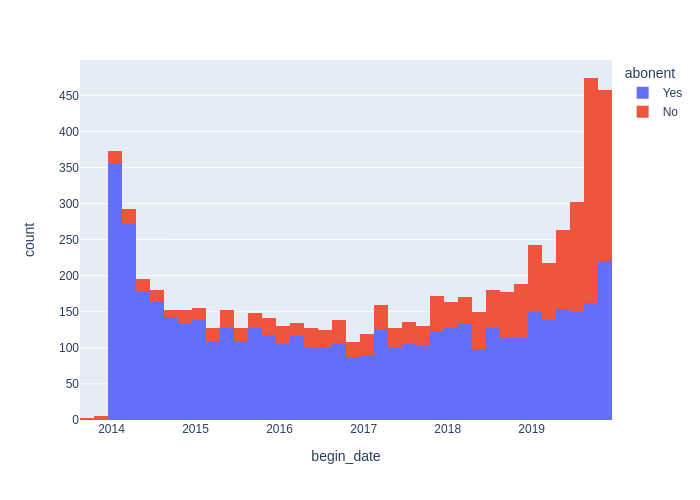

Оевидно что Duration будет имень большое значение важности при моделировании.
Но продолжительность жизни абонента не может влиять на решение абонента: оставаться или нет, это только косвенно говорит о том что в компании в 2019 году начались какие то изменения приводящие к оттоку клиентов, и усугубившиеся к концу 2019 года.
<br><br>
В поисках самой проблемы оттока я обнаружил что большинство оттока происходит у подклченных к оптическому волокну.
 
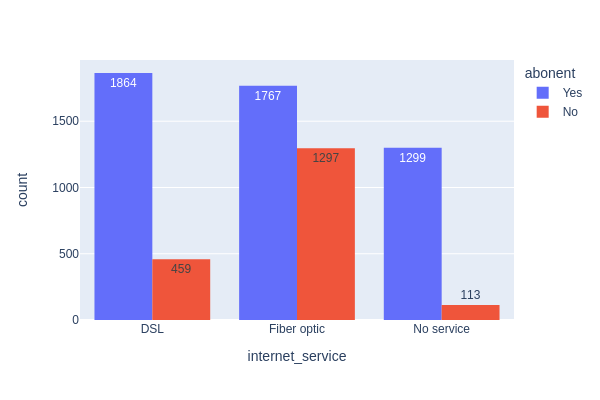

Из графиков видно, что признак наличия оптического подключения имеет линейную связь с оттоком, тогда как на отток не влияет - многоли у абонента телефонных линий. Также видим что количество абонентов без интернета больше чем без телефонии.
<br><br>
Во время проведения анализа были созданы новые и определены признаки которые могу оказывать сильное влияние на отток клиентов, используем их для прогнозирования целевой переменной и оценим это влияние.
<br><br>
На мой взгляд данных которые бы явно указывали на решение абонента в скорем времени утеч тут нет: например обращения в тех поддерку, глобальных аварий, качество (скорость и объем) загрузки трафика абонентом среднее за месяц, место проживание (город, село), количество аварий на сети в районе абонента, тарифный план, присутствие сторонних провайдеров ...

Вопремя исследований было не просто обнаружить реальную причину оттока из-за изменения профиля типичного аббонента до 2019 и в 2019 году. Но визуализация частотного распределения признаков для абонентов подключенных до 2019 показала ощутиму разницу во многих аспектах с абонентами подключенными в 2019году.  Для этого необходимо было использовать новый признак begin_in_2019.

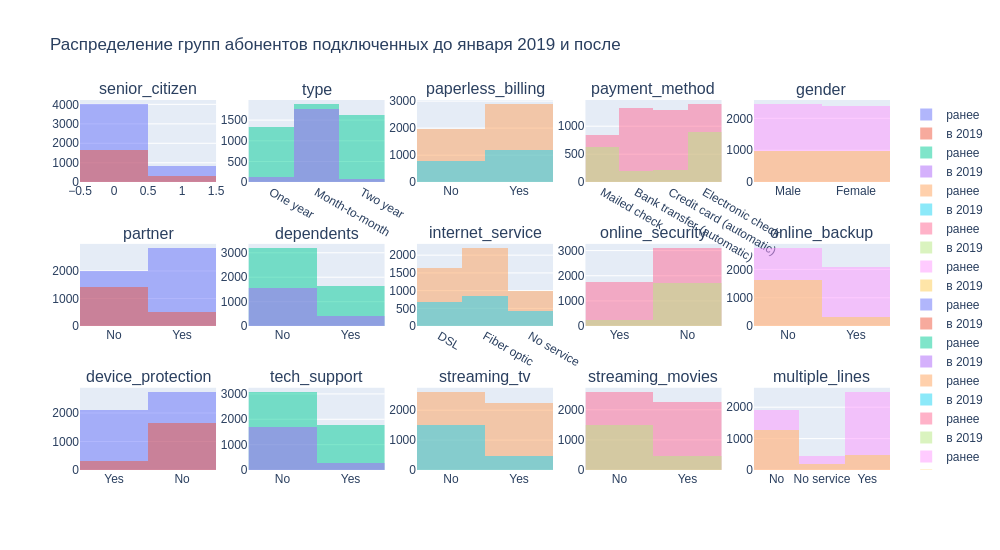

На графиках видим что типичные портреты абонентов, подключенных до января 2019 и после, различаются во многих признаках:
- тип платежей - подключенные до 2019 года в 10 раз чаще заключали годовой контракт
- автоматический тип оплаты в 2018 году во много сократился
- в 2019 году подключалось больше без партнеров
- в 2019 году абсолютное большинство подключаемых отказывались от доп услуг, мало кто подключат дополнительные телефонные линии

## Модели

Для обучения моделей я решил не брать признаки с датами так как это нарушает бизнес логику. Также отказался использовать признак суммарных платежей из-за высокой корреляции с продолжительностью жизни абонента это привело бы к мультиколлинеарности и искажению влияния на целевой признак.
<br><br>
 Перед тем как стороить модели признаки были закодированны алгоритмом OHE и произведено масштабирование для того чтобы нивелировать влияние дисперсии на работу различных алгоритмов машинного обучения.
 <br><br>
 Я зарезервировал 20% данных для тестирования и использовал оставшиеся 80% для обучения.
 <br><br>
 Для решения задачи классификации был проведен "конкурс" среди базовых алгоритмов классификации с гиперпараметрами по умолчанию в результате которогго для дальнейшей работы был выбран алгоритм градиентного бустинга из библиотеки Catboost.

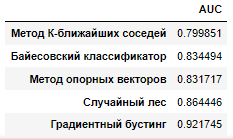

Для подбора гипер параметров я использовал Optuna — это программная среда для автоматической оптимизации гиперпараметров случайным перебором, но с некоторой оптимизацией позволяющей количество вариантов перебора. <br><br>
После подбора параметров и их валидации алгроитм показал на требуемой метрике AUC значение 0.94.
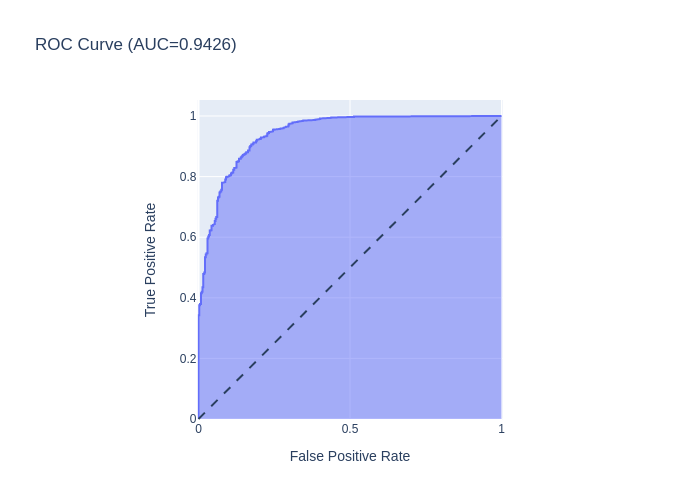

## Результаты

С помощью полученной модели с подобранной чуствительностью мы можем верно классифицировать около 75 процентов абонентов из планирующих отключиться и на каждые пять таких абонентов будет приходиться один абонент ложноклассифицированный(как отток). Так же с помощью полученных вероятносте предсказаний модели можно опоедилить группу риска - скем нужно работать в первую очередь Если необходимо охватить больший процент оттока то придется закладывать возможность раздавать больше промокодов - что тоже может привести уменьшению прибыли на абонентах которые не планировали отключаться.

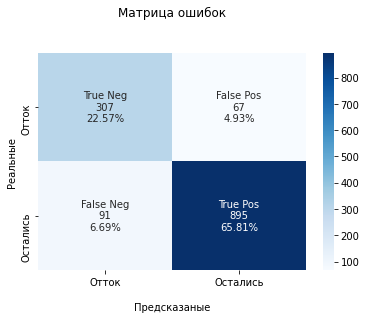

Анализ модели подтвердил обнаруженные взаимосвязи и указывает на то что у провайдера проблемы с удержание абонентов подключенных в последнее время по оптоволокону.

## Будущее

Что можно улучшить:

- изучить подробнее плияние признаков, убрать те которые вносят больше шума чем пользы.
- получить больше данных для исследований: больше абонентов и больше признаков для них.


## Рекомендация провайдеру.
Собрать обратную связь с абонентов и отключившихя и не отключившихся. Обратить внимание на качество работы оптико-волоконной сети, скорее всего оно деградирует. Возможно в 2019 года начали подключать абонентов в новой для сябе районе - требуется лучше изучить рынок провайдерских услуг на местности - абоненты отключаются и переключаются к конкурентам. Возможно нужно пересмотреть тарифную политику.
